In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

In [ ]:
os.listdir("/content/drive/MyDrive/Dataset/BisIndo")

['kamu',
 'benci',
 'jangan',
 'minum',
 'kakak',
 'halo',
 'minta',
 'dia',
 'pagi',
 'rumah',
 'jam',
 'apa',
 'keren',
 'baik',
 'sabar',
 'malu',
 'ada',
 'main',
 'kenapa',
 'bantu',
 'ayah',
 'bercanda',
 'cinta',
 'aku',
 'kangen',
 'kapan',
 'ini',
 'ingin',
 'jalan-jalan',
 'keadaan',
 'lihat',
 'kerja',
 'maaf',
 'malam',
 'marah',
 'malas',
 'salah',
 'sayang',
 'sakit',
 'sama-sama']

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input

In [ ]:
#sample img
adaImg = image.load_img("/content/drive/MyDrive/Dataset/BisIndo/ada/ada_1.jpg")
akuImg = image.load_img("/content/drive/MyDrive/Dataset/BisIndo/aku/aku_1.jpg")
apaImg = image.load_img("/content/drive/MyDrive/Dataset/BisIndo/apa/apa_1.jpg")
ayahImg = image.load_img("/content/drive/MyDrive/Dataset/BisIndo/ayah/ayah_1.jpg")

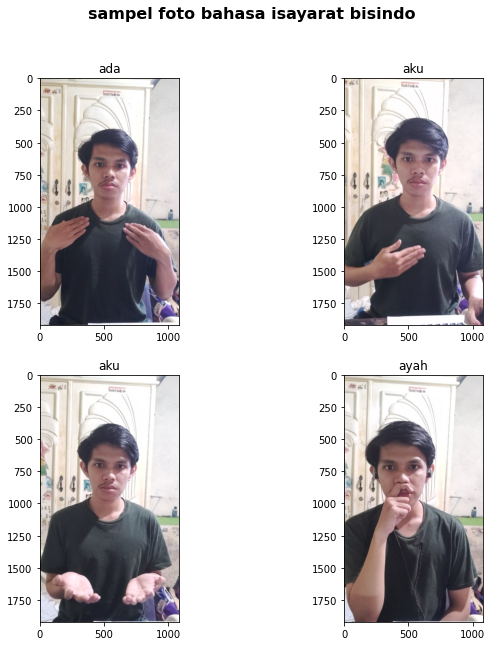

In [ ]:
#visualisai sample img
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(ncols=2,
                                             nrows=2,
                                             figsize=(10, 10))
#ax0 sample ada
ax0.imshow(adaImg)
ax0.set(title="ada")

#ax1 sample aku
ax1.imshow(akuImg)
ax1.set(title="aku")

#ax2 sample apa
ax2.imshow(apaImg)
ax2.set(title="aku")

#ax3 sample ayah
ax3.imshow(ayahImg)
ax3.set(title="ayah")

fig.suptitle("sampel foto bahasa isayarat bisindo", fontsize=16, fontweight="bold")
plt.show()

In [ ]:
train_dir = os.path.join("/content/drive/MyDrive/Dataset/BisIndo")
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   validation_split=0.1) # set validation

In [ ]:
# train data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode="categorical",
    subset="training"
) # set as training data

# validation data
validation_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=16,
    class_mode="categorical",
    subset="validation"
)

Found 6117 images belonging to 40 classes.
Found 674 images belonging to 40 classes.


In [ ]:
# Model transfer Learning by VGG16
from tensorflow.keras.applications import VGG16

model = tf.keras.models.Sequential([
    VGG16(weights="imagenet", include_top=False,
          input_tensor=Input(shape=(150, 150, 3))),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8192, activation="relu"),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(4095, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(40, activation="softmax")
])

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 8192)              67117056  
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 4095)              33550335  
                                                                 
 dropout_1 (Dropout)         (None, 4095)              0         
                                                                 
 dense_2 (Dense)             (None, 40)                1

In [ ]:
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint("Weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5",
                                             monitor='val_loss', 
                                             verbose=0, save_best_only=False,
                                             save_weights_only=False, 
                                             mode='auto', 
                                             period=1)

In [ ]:
model.fit(train_generator,
                      validation_data=validation_generator,
                      epochs=15,
                      verbose=1,
                      shuffle=True,
                      callbacks=[checkpoint])

Epoch 1/15
765/765 [==============================] - 3700s 5s/step - loss: 3.6727 - accuracy: 0.0433 - val_loss: 3.2857 - val_accuracy: 0.1677
Epoch 2/15
765/765 [==============================] - 143s 187ms/step - loss: 2.1667 - accuracy: 0.4102 - val_loss: 0.2412 - val_accuracy: 0.9659
Epoch 3/15
765/765 [==============================] - 144s 188ms/step - loss: 0.2583 - accuracy: 0.9207 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 4/15
765/765 [==============================] - 143s 187ms/step - loss: 0.0610 - accuracy: 0.9828 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 5/15
765/765 [==============================] - 138s 180ms/step - loss: 0.0265 - accuracy: 0.9931 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 6/15
765/765 [==============================] - 138s 180ms/step - loss: 0.0341 - accuracy: 0.9926 - val_loss: 1.5329e-04 - val_accuracy: 1.0000
Epoch 7/15
765/765 [==============================] - 137s 180ms/step - loss: 0.0093 - accuracy: 0.9972 - val_loss: 5.0868

NameError: ignored

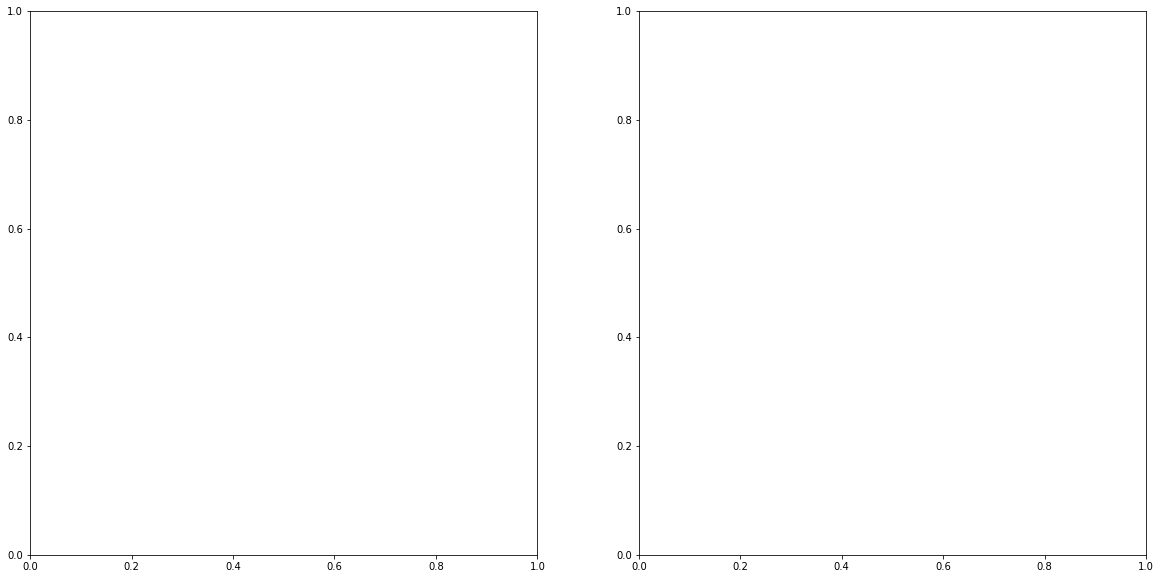

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2,
                              nrows=1,
                              figsize=(20, 10))


# accuracy
ax0.plot(model.history["accuracy"])
ax0.plot(model.history["val_accuracy"])
ax0.set(title="accuracy",
        xlabel="epoch",
        ylabel="accuracy")

# loss
ax0.plot(model.history["loss"])
ax0.plot(model.history["val_loss"])
ax0.set(title="accuracy",
        xlabel="epoch",
        ylabel="accuracy")


In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)

model.save_weights("model_weight.h5")
print("save model to disk")

save model to disk


In [ ]:
#save model
import pickle
with open("model_pkl", "wb") as files:
  pickle.dump(model, files)

In [ ]:
import joblib
joblib.dump(model, "model_jlib")

['model_jlib']

In [ ]:
import numpy as np
from keras.applications.vgg16 import preprocess_input
from keras.applications import VGG16 



img_path = "/content/drive/MyDrive/Dataset/Bisindo1/ada/0.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

category = model.predict(img_data, batch_size=1)
if category == 0:
  print("ada")
else:
  print("messy")
#print vgg16_category.shape

1/1 [==============================] - 0s 15ms/step


ValueError: ignored

In [ ]:
print category
# print vgg16_category.shape

SyntaxError: ignored